# TF 분류 모델

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 당뇨병 데이터
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-511/master/data/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


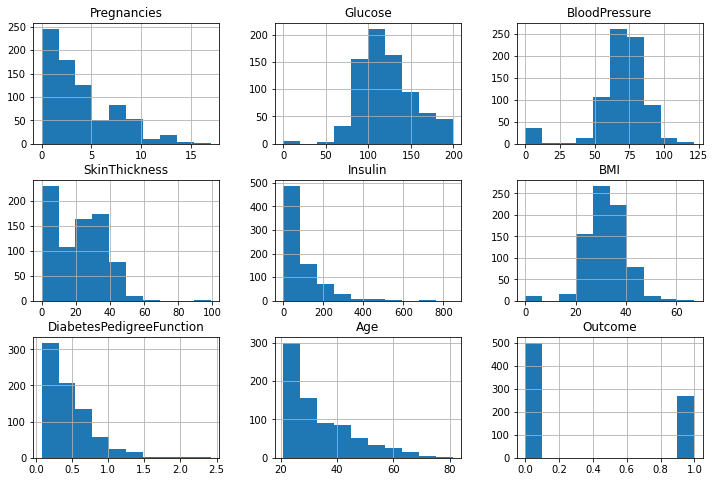

In [ ]:
df.hist(figsize=(12, 8));

# train_test_split

In [ ]:
label = "Outcome"

In [ ]:
y = df[label]
x = df.drop(columns=label)

x.shape, y.shape

((768, 8), (768,))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## 활성화 함수 알아보기

In [ ]:
import tensorflow as tf

### TF에서 제공하는 활성화 함수 종류

In [ ]:
dir(tf.keras.activations)[10:]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

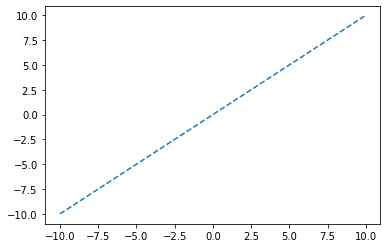

In [ ]:
# 1차 함수
x = np.arange(-10, 10, 0.1)
plt.plot(x, x, linestyle='--', label="x") 

### sigmoid

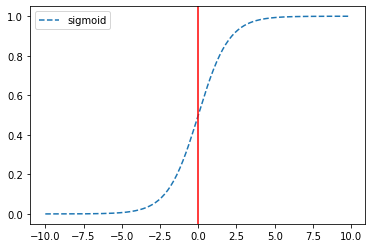

In [ ]:
# 1차 함수에 시그모이드 함수 적용한 모습
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle='--', label="sigmoid")
plt.axvline(0, color="r")
plt.legend()

### swish

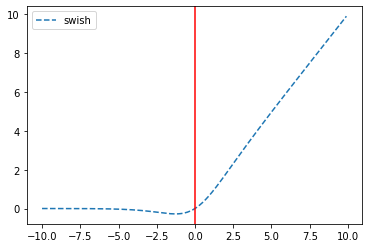

In [ ]:
# swish 함수 적용한 모습
plt.plot(x, tf.keras.activations.swish(x), linestyle='--', label="swish")
plt.axvline(0, color="r")
plt.legend()

### relu

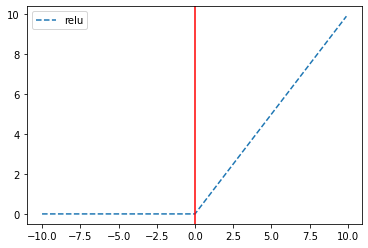

In [ ]:
# relu 함수 적용한 모습
plt.plot(x, tf.keras.activations.relu(x), linestyle='--', label="relu")
plt.axvline(0, color="r")
plt.legend()

## 딥러닝 모델

### 공식 문서 다중 클래스 분류 모델

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 이진 분류로 변경

In [ ]:
# 입력값 = x_train의 데이터
input_shape = len(x_train.columns)
input_shape

8

In [ ]:
model = tf.keras.models.Sequential([
  # 입력층 변경, Flatten은 2차원을 1차원으로 바꿔주는 것
  # 당뇨병 데이터는 1차원이라서 Dense
  tf.keras.layers.Dense(128, input_shape=[input_shape]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  # 출력층 변경
  tf.keras.layers.Dense(1, activation='sigmoid')
])

### 모델 컴파일도 이진 분류에 맞게 변경
* loss 변경

In [ ]:
model.compile(optimizer='adam',
              
              # 이진 분류에 맞는 손실 함수로 변경
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________


[공식문서 코드](https://www.tensorflow.org/tutorials/keras/regression#%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8)

In [ ]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print("")
        print('.', end='')

# val_loss 기준으로 값이 나아지지 않으면 멈춤
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, 
                    callbacks=[early_stop, PrintDot()])

#### 이건 내 맘

In [ ]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print("")
        print('.', end='')

# val_loss 기준으로 값이 나아지지 않으면 멈춤
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [ ]:
model.fit(x_train, y_train, epochs=100, callbacks=[early_stop, PrintDot()])

In [ ]:
history.history

{'loss': [0.5186066627502441,
  0.5029466152191162,
  0.5196904540061951,
  0.5163494944572449,
  0.5249420404434204,
  0.5271440744400024,
  0.5234754085540771,
  0.5226489901542664,
  0.530066192150116,
  0.5274571776390076,
  0.5074074864387512,
  0.5077347159385681],
 'accuracy': [0.7393075227737427,
  0.7576375007629395,
  0.7209776043891907,
  0.7209776043891907,
  0.7331975698471069,
  0.7311608791351318,
  0.7433808445930481,
  0.7617108225822449,
  0.7270875573158264,
  0.7372708916664124,
  0.7331975698471069,
  0.7393075227737427],
 'val_loss': [0.4647067189216614,
  0.458730012178421,
  0.47915923595428467,
  0.4634671211242676,
  0.4713984727859497,
  0.48915937542915344,
  0.4778211712837219,
  0.4704471230506897,
  0.4802960157394409,
  0.4706566035747528,
  0.48476511240005493,
  0.4869253933429718],
 'val_accuracy': [0.7642276287078857,
  0.8130081295967102,
  0.772357702255249,
  0.7886179089546204,
  0.7804877758026123,
  0.7560975551605225,
  0.7642276287078857,
  0

## 학습 결과

In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,5.249237,0.578411,4.928684,0.634146
1,3.426735,0.566191,1.059874,0.674797
2,3.068098,0.566191,1.692225,0.601626
3,2.331007,0.582485,1.667920,0.650406
4,1.761949,0.598778,1.122864,0.682927
...,...,...,...,...
57,0.581987,0.720978,0.553425,0.682927
58,0.585161,0.716904,0.550799,0.723577
59,0.568447,0.745418,0.542049,0.707317
60,0.581718,0.700611,0.553473,0.682927


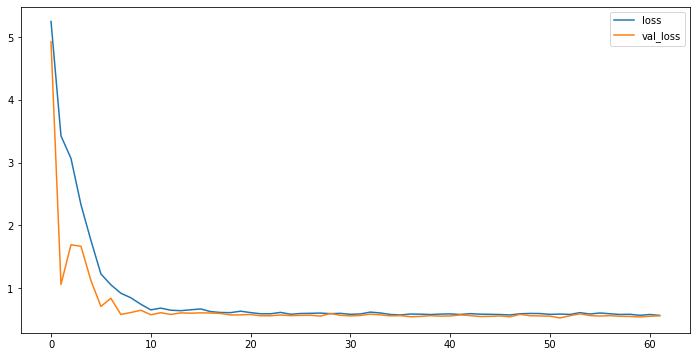

In [ ]:
# 학습 결과 시각화
df_hist[["loss", "val_loss"]].plot(figsize=(12, 6));

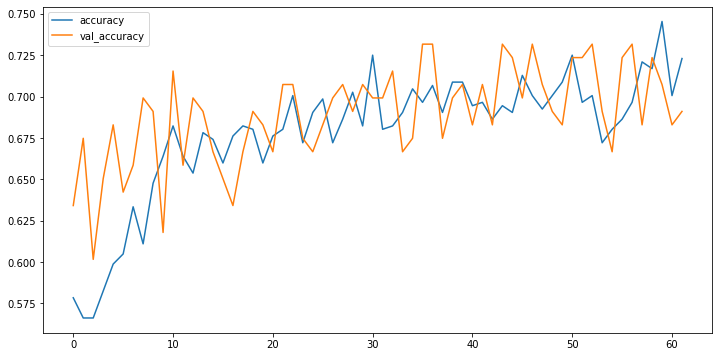

In [ ]:
df_hist[["accuracy", "val_accuracy"]].plot(figsize=(12, 6));